# Data Analysis and Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, stats
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
path = '../data/price_data.csv'

df = pd.read_csv(path, index_col = 'Unnamed: 0')

# Printing out the first three rows
df[:3]

,id,listing,district,area,address,xiaoqu,sqm,room,lvgroom,year,...,floor,direction,price,lat,lng,postal,station_1,station_2,dist_1,dist_2
0,shpdz000063817,"三航小区(浦东南路595弄),小区中心位置,带露台,非底楼房,产证在手",浦东,陆家嘴,浦东南路595弄,三航小区(浦东南路595弄),44,1,1.0,1985.0,...,high,S,4300,31.235486,121.512842,NaN,东昌路站,商城路,500.0,1400.0
1,shqpz000003356,"圣堡别墅,客厅带阳台,独栋别墅,位置安静,带花园",青浦,沪青平,联民路99弄,圣堡别墅,335,4,2.0,2011.0,...,high,S,37000,31.156905,121.279343,NaN,徐泾东,泗泾,5400.0,5700.0
2,shhkz000021285,"溧阳华府,主卧朝南,一梯两户,靠近地铁口,采光充足",虹口,四平路,四平路283号,溧阳华府,66,1,2.0,2011.0,...,high,S,7800,31.262986,121.488545,200085.0,海伦路,东宝兴路,1000.0,1700.0


## The Description of the dataset

The dataset has 15185 rows after cleaning and has the following features:

--------------------------------------
X:
- id: the ID of the listing in the original database
- listing: the original wording of the listing
- district: the district of Shanghai in which the apartment is found
- area: the sub-district of Shanghai in which the apartment is found
- address: the address of the apartment
- xiaoqu: the neighbourhood (i.e. subsub-district) of Shanghai in whcih the apartment is found
- sqm: the area of the apartment in square meters
- room: number of bedrooms in the apartment
- lvgroom: number of livingrooms in the apartment
- year: the year in which the building was built
- renovation: the category of renovation (sheer, old, medium renovation, good renovation, luxury renovation)
- floor: categorical variable for the height at which the apartment is located (low, medium, high)
- direction: the cardinal direction in which the windows and the entrance are located
- lat: latitude
- lng: longitude
- station_1: the first closest metro station to the apartment
- station_2: the second closest metro station to the apartment
- dist_1: the distance to station_1
- dist_2: the distance to station_2
--------------------------------------
Y:
- price: the monthly rental price of the apartment in RMB


In [3]:
df.describe()

,sqm,room,lvgroom,year,renovation,price,lat,lng,postal,dist_1,dist_2
count,15185.000000,15185.000000,15185.000000,15185.000000,15185.000000,15185.000000,15185.000000,15185.000000,8378.000000,13713.000000,13713.000000
mean,102.671189,2.215542,1.557458,2000.961673,2.695028,10495.995719,31.208391,121.461611,200397.030198,2513.826296,4247.057537
std,63.851396,0.983917,0.624202,10.281015,0.728244,10658.103585,0.098611,0.096434,4261.405599,5572.041697,6648.672584
min,7.000000,1.000000,0.000000,1917.000000,1.000000,900.000000,30.707683,121.046171,55328.000000,0.000000,300.000000
25%,60.000000,2.000000,1.000000,1996.000000,2.000000,4500.000000,31.178142,121.407319,200085.000000,800.000000,1400.000000
50%,90.000000,2.000000,2.000000,2003.000000,3.000000,7000.000000,31.215022,121.472943,200125.000000,1200.000000,2200.000000
75%,126.000000,3.000000,2.000000,2007.000000,3.000000,13000.000000,31.258746,121.529060,201203.000000,2000.000000,3700.000000
max,900.000000,30.000000,6.000000,2017.000000,4.000000,260000.000000,31.591991,121.798240,215332.000000,44700.000000,47200.000000


## The Distribution of the Price of the Aparmtent, Skewedness and Kurtosis

Skewness: 5.160431
Kurtosis: 60.122519


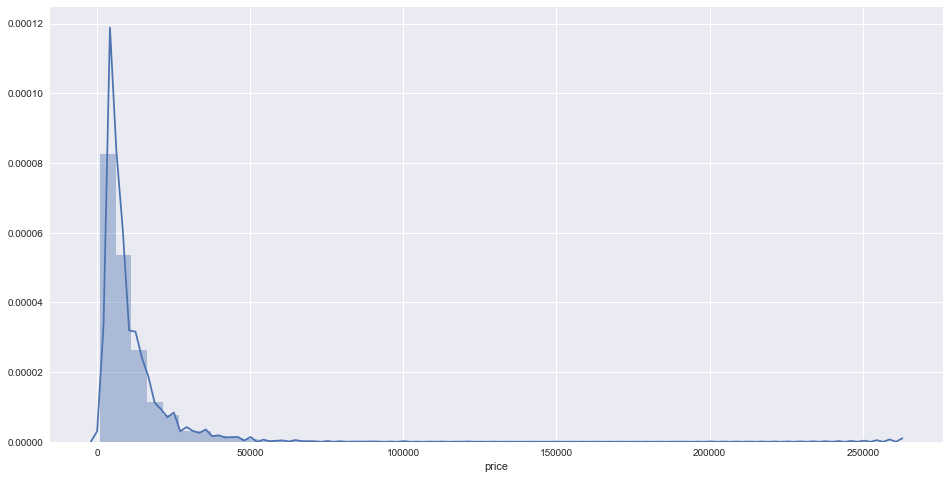

In [4]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 16,8

fig, ax = plt.subplots()
fig.figsize=(16,8)
sns.distplot(df['price'], ax=ax)
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

plt.savefig('../figures/kurtosis.png')

## Scatter plot of living area vs. price

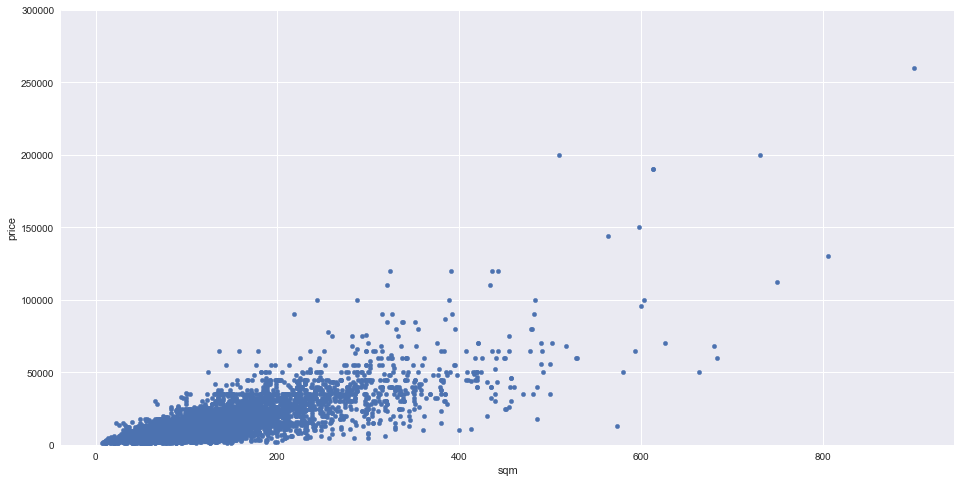

In [5]:
var = 'sqm'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,300000), figsize=(16,8));

plt.savefig('../figures/priceVsSqm.png')

## Scatter plot of longitude vs. latitude (a map recreation)

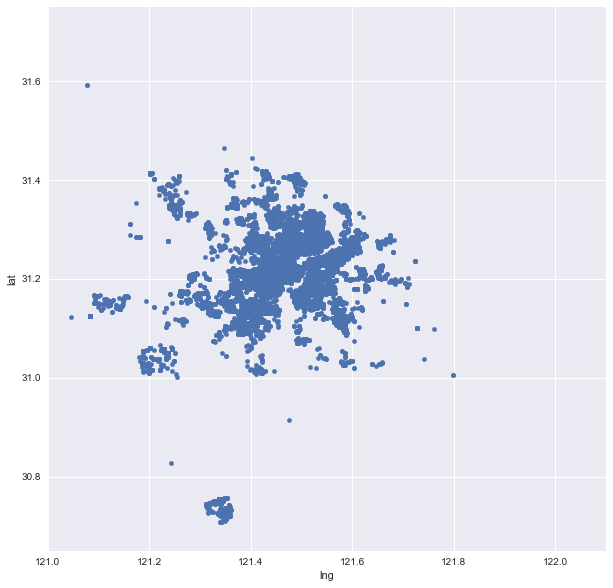

In [6]:
var = 'lng'
data = pd.concat([df['lat'], df[var]], axis=1)
data.plot.scatter(x=var, y='lat', xlim=(121,122.1), ylim=(30.65,31.75), figsize=(10,10))
plt.savefig('../figures/latlng.png')

## Box plot of the year and price

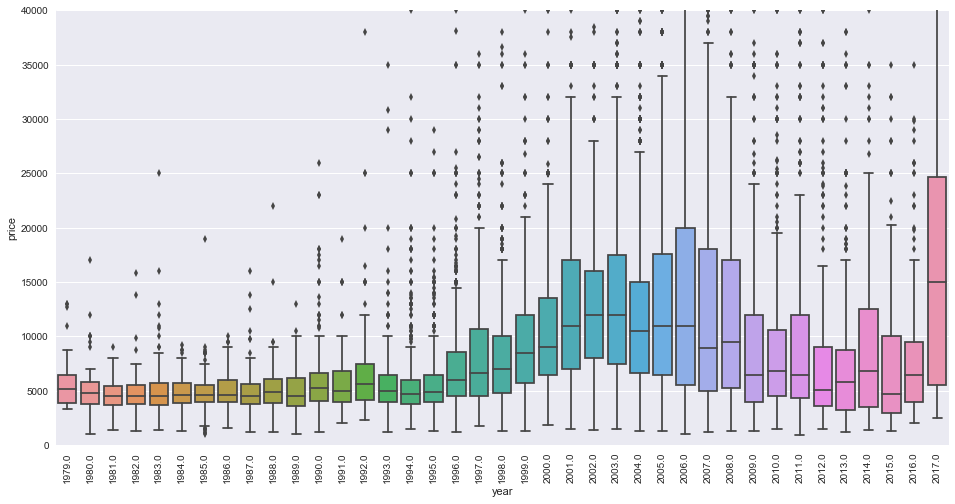

In [7]:
filtered = df.groupby('year').filter(lambda x: len(x) >= 32)

var = 'year'
data = pd.concat([filtered['price'], filtered[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="price", data=data)
plt.xticks(rotation=90)
fig.axis(ymin=0, ymax=40000);

plt.savefig('../figures/year.png')

## Box plot renovation and price

As expected, the more renovated (nicer) the apartment is, the higher the price of the apartment. 

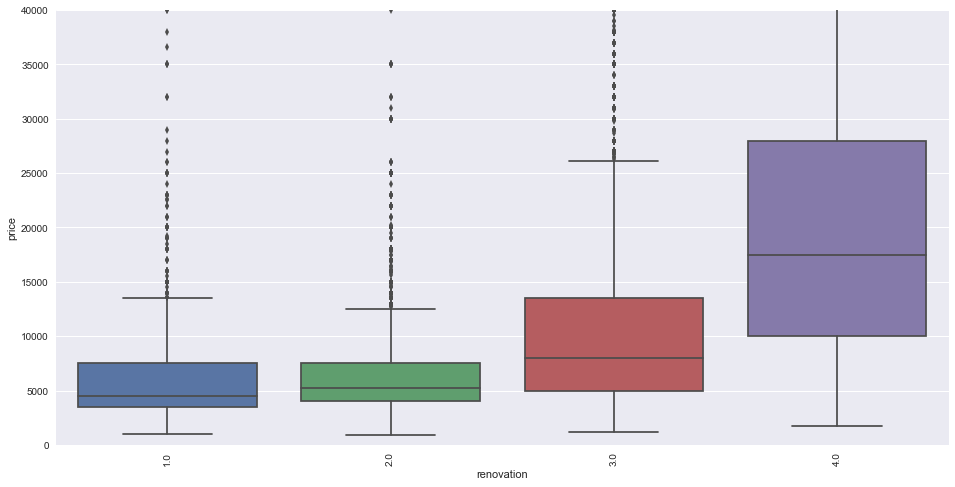

In [8]:
var = 'renovation'
data = pd.concat([filtered['price'], filtered[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="price", data=data)
plt.xticks(rotation=90)
fig.axis(ymin=0, ymax=40000);

## Box plot of Floor vs. Price

The average price of the apartment for lower floors are higher, but their 25th and 75th percentile are also wider. Perhaps owing to the large number of historic buildings, apartments that are situated lower cost higher.

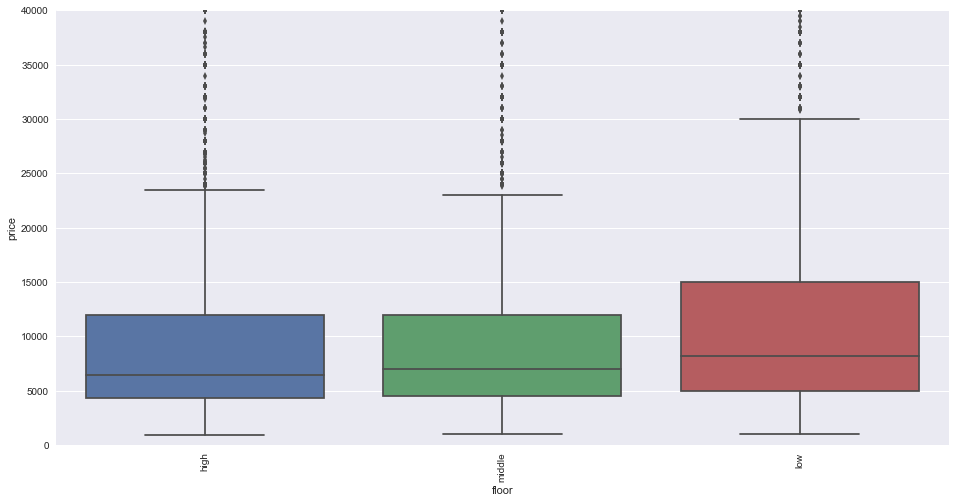

In [9]:
var = 'floor'
data = pd.concat([filtered['price'], filtered[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="price", data=data)
plt.xticks(rotation=90)
fig.axis(ymin=0, ymax=40000);

## Postal code vs. price

The highest average price goes for Lujiazui, the financial district of Shanghai

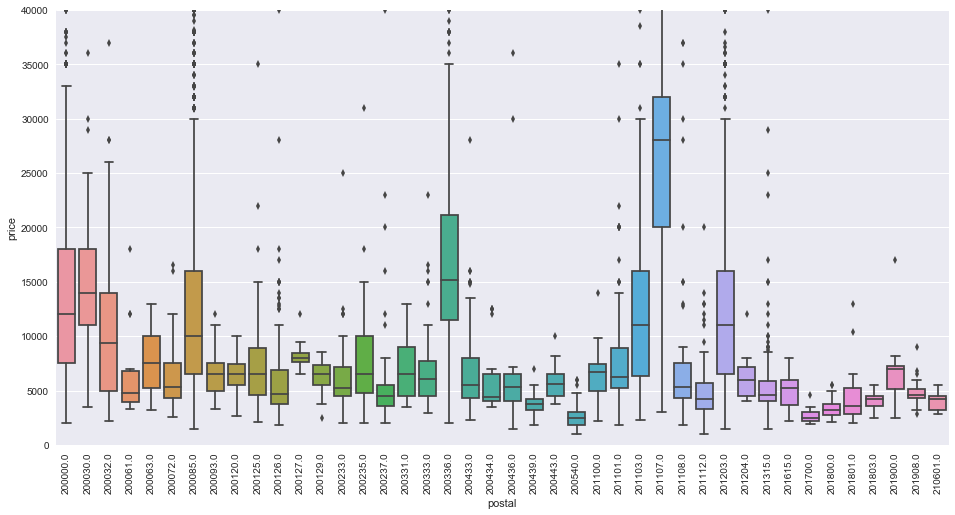

In [10]:
filtered = df.groupby('postal').filter(lambda x: len(x) >= 12)

var = 'postal'
data = pd.concat([filtered['price'], filtered[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="price", data=data)
plt.xticks(rotation=90)
fig.axis(ymin=0, ymax=40000);

plt.savefig('postalcode.png')

## Performing a sanity check to see if any of the data is missing

Most of the postal code data is missing, therefore that column will be removed. A good 10% of the data on the closest station is missing, which could be a systematic error in the API that found the shortest path to the closest station with the geolocation of the apartment. For now, the analysis will continue ignoring these columns as location data is represented in latitutde and longitude values.

In [11]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
postal,6807,0.448271
dist_2,1472,0.096938
station_2,1472,0.096938
station_1,1472,0.096938
dist_1,1472,0.096938
room,0,0.000000
listing,0,0.000000
district,0,0.000000
area,0,0.000000
address,0,0.000000


## Correlation Matrix

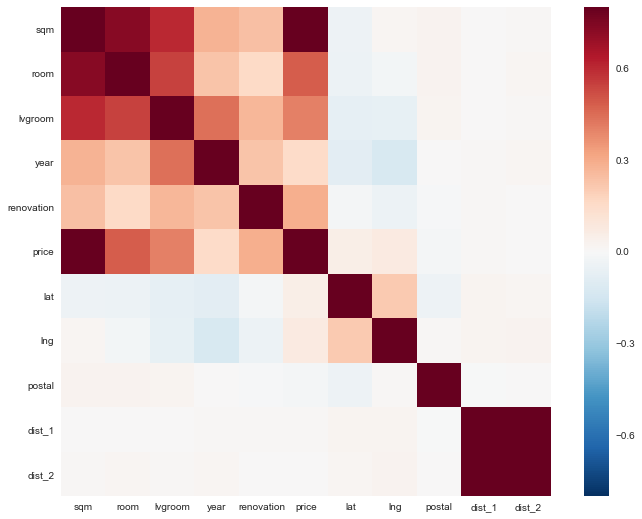

In [12]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
fig = sns.heatmap(corrmat, vmax=.8, square=True);

f.savefig("../figures/corrmatrix.png")

In [13]:
df.sort_values(by = 'sqm', ascending = False)[:5]

,id,listing,district,area,address,xiaoqu,sqm,room,lvgroom,year,...,floor,direction,price,lat,lng,postal,station_1,station_2,dist_1,dist_2
17151,shcnz000008725,"兆丰广场,大开间,大平层,繁华地段,配套成熟",长宁,中山公园,长宁路1027号,兆丰广场,900,1,1.0,2002.0,...,middle,S,260000,31.217752,121.417820,200050.0,NaN,NaN,NaN,NaN
4075,shpdz000068710,"御翠园,南北通透,近商圈,房型正气,拎包入住",浦东,联洋,花木路1883弄,御翠园,806,6,3.0,2015.0,...,low,NS,130000,31.214393,121.563503,NaN,延长路,上海马戏城,1400.0,4300.0
17277,shhkz000018266,"宝山路商铺(虹口),一门关,大平层,底楼房,配套成熟",闸北,中兴,宝山路,宝山路商铺(虹口),750,1,1.0,1999.0,...,high,S,112500,31.258144,121.477723,200000.0,NaN,NaN,NaN,NaN
13905,shpdz000059078,"九间堂,主卧朝南,独栋别墅,繁华地段,拎包入住",浦东,联洋,芳甸路599弄,九间堂,731,8,4.0,2006.0,...,high,NS,200000,31.223119,121.561211,201203.0,嘉善路,陕西南路,700.0,1000.0
9848,shqpz000003552,"西郊大公馆,主卧朝南,带采光天井,小区景观位置,带地暖",青浦,徐泾,徐泾东路333弄,西郊大公馆,684,4,2.0,2005.0,...,low,S,60000,31.188286,121.299327,NaN,松江新城,松江大学城,2000.0,3100.0


In [14]:
df.sort_values(by = 'price', ascending = False)[:5]

,id,listing,district,area,address,xiaoqu,sqm,room,lvgroom,year,...,floor,direction,price,lat,lng,postal,station_1,station_2,dist_1,dist_2
17151,shcnz000008725,"兆丰广场,大开间,大平层,繁华地段,配套成熟",长宁,中山公园,长宁路1027号,兆丰广场,900,1,1.0,2002.0,...,middle,S,260000,31.217752,121.417820,200050.0,NaN,NaN,NaN,NaN
9864,shhkz000021415,"新外滩花苑,主卧朝南,大平层,繁华地段,采光充足",虹口,北外滩,东大名路888弄,新外滩花苑,510,6,4.0,2002.0,...,high,W,200000,31.250695,121.504621,200000.0,宝杨路,友谊路,3500.0,4800.0
13905,shpdz000059078,"九间堂,主卧朝南,独栋别墅,繁华地段,拎包入住",浦东,联洋,芳甸路599弄,九间堂,731,8,4.0,2006.0,...,high,NS,200000,31.223119,121.561211,201203.0,嘉善路,陕西南路,700.0,1000.0
15912,shpdz000072973,"上海沃德医疗中心,南北通透,独立电梯,繁华地段,配套成熟",浦东,陆家嘴,"南泉北路399号,世纪大道787号",上海沃德医疗中心,613,6,2.0,2009.0,...,middle,NS,190000,31.233856,121.516760,NaN,NaN,NaN,NaN,NaN
15922,shpdz000073060,"上海沃德医疗中心,南北通透,独立电梯,繁华地段,配套成熟",浦东,陆家嘴,"南泉北路399号,世纪大道787号",上海沃德医疗中心,613,5,2.0,2009.0,...,middle,NS,190000,31.233856,121.516760,NaN,NaN,NaN,NaN,NaN


In [15]:
df.sort_values(by = 'lat', ascending = True)[:50]

,id,listing,district,area,address,xiaoqu,sqm,room,lvgroom,year,...,floor,direction,price,lat,lng,postal,station_1,station_2,dist_1,dist_2
6596,shjsz000001223,"石化十一村,2室1厅,1200元/月",金山,金山,石化十一村,石化十一村,52,2,1.0,1987.0,...,high,E,1200,30.707683,121.340276,200540.0,金科路,张江高科,400.0,2000.0
6595,shjsz000001213,"石化十一村,2室1厅,1500元/月",金山,金山,石化十一村,石化十一村,51,2,1.0,1985.0,...,low,S,1500,30.707683,121.340276,200540.0,陆家浜路,南浦大桥,500.0,1400.0
6469,shjsz000001252,"石化十二村,2室0厅,1600元/月",金山,金山,石化十二村,石化十二村,47,2,0.0,1987.0,...,middle,S,1600,30.708696,121.343840,NaN,御桥,罗山路,5900.0,11600.0
2883,shjsz000002790,"石化十三村,大开间,繁华地段,黄金楼层,小户型",金山,金山,石化十三村,石化十三村,54,2,1.0,1981.0,...,middle,S,1400,30.709688,121.349152,200540.0,打浦桥,嘉善路,500.0,600.0
2939,shjsz000003068,"石化九村,小户型,繁华地段,黄金楼层,近商圈",金山,金山,石化九村,石化九村,50,2,1.0,1980.0,...,high,S,1500,30.711845,121.347260,200540.0,锦江乐园,上海南站,900.0,2700.0
15119,shjsz000000702,"石化九村,南北通透,底楼房,采光充足,繁华地段",金山,金山,石化九村,石化九村,40,1,1.0,1980.0,...,low,NS,1000,30.711845,121.347260,200540.0,顾村公园,宝安公路,3000.0,11000.0
6514,shjsz000001257,"石化八村,1室1厅,1600元/月",金山,金山,石化八村,石化八村,48,1,1.0,1985.0,...,low,S,1600,30.712188,121.346997,200540.0,广兰路,金科路,1100.0,3100.0
14807,shjsz000001719,"石化八村,2室1厅,1500元/月",金山,金山,石化八村,石化八村,55,2,1.0,2015.0,...,high,NS,1500,30.712188,121.346997,200540.0,浦三路,罗山路,8000.0,12800.0
2950,shjsz000003086,"石化八村,主卧朝南,非底楼房,采光充足,非顶楼房",金山,金山,石化八村,石化八村,68,2,1.0,1989.0,...,high,W,1800,30.712188,121.346997,200540.0,锦江乐园,上海南站,2100.0,2700.0
3815,shjsz000002306,"石化六村,位置安静,拎包入住,中式风格,视野好",金山,金山,石化六村,石化六村,40,1,1.0,1976.0,...,middle,E,1300,30.713628,121.345363,200540.0,上海体育馆,上海体育场,400.0,400.0


In [16]:
from scipy import stats

price_z = stats.zscore(df.price)
count = 0

for i in range(len(price_z)):
    if abs(price_z[i]) > 3:
        print(i, price_z[i])
        count += 1
    
print(count)
# df1 = df.where(stats.zscore(df.price) < 3)

204 5.395509375683699
226 3.0497990885526165
630 4.175740026375536
640 3.70659796894932
991 3.2374559115231034
1380 4.175740026375536
1389 4.644882083801752
1640 5.583166198654185
1662 3.518941145978833
1767 6.052308256080401
1771 10.274586772916349
1783 3.2374559115231034
1795 9.336302658063916
1797 3.70659796894932
1928 6.052308256080401
1992 3.42511273449359
2042 3.14362750003786
2049 3.70659796894932
2078 4.9263673182574825
2352 10.274586772916349
2368 5.395509375683699
2376 4.644882083801752
2456 4.644882083801752
3257 3.2374559115231034
3444 5.114024141227969
3599 3.70659796894932
3614 3.0497990885526165
3683 3.0497990885526165
3740 4.644882083801752
3762 11.212870887768782
3888 4.175740026375536
3976 7.45973442835905
3978 4.644882083801752
3982 3.70659796894932
4071 5.114024141227969
4072 3.0497990885526165
4076 3.70659796894932
4134 4.644882083801752
4232 4.175740026375536
4248 3.14362750003786
4255 3.0497990885526165
4312 3.2374559115231034
4319 3.2374559115231034
4374 7.45973

In [17]:
sqm_z = stats.zscore(df.sqm)
count = 0

for i in range(len(sqm_z)):
    if abs(sqm_z[i]) > 3:
        print(i, sqm_z[i])
        count += 1
    
print(count)

1 3.638706074963346
582 3.5760585530450695
640 3.0905402581784243
1354 3.37245410681067
1380 3.278482823933255
1389 3.2628209434536855
1640 6.254240115051402
1767 3.607382314004208
1771 5.33018916675682
1795 3.4194397482493777
1869 3.0905402581784243
2025 3.059216497219286
2049 5.032613437645005
2345 3.325468465371962
2352 3.466425389688085
2368 9.04205484041472
2376 3.6700298359224846
2391 3.6543679554429156
2401 3.8892961626364535
2417 3.012230855780578
2456 3.4977491506472234
2500 3.137525899617132
3235 4.860332752369744
3278 3.0278927362601475
3324 3.6700298359224846
3328 3.4037778677698083
3599 4.797685230451467
3615 3.278482823933255
3740 3.7483392383203307
3762 11.015451780840438
3888 3.857972401677315
3919 3.591720433524639
3931 3.4037778677698083
3961 3.4037778677698083
3974 3.4194397482493777
3978 6.6771108879997705
4006 3.4194397482493777
4020 3.1688496605762704
4032 3.1688496605762704
4071 4.782023349971897
4137 3.6543679554429156
4231 3.0905402581784243
4232 3.325468465371

In [18]:
lat_z = stats.zscore(df.lat)
count = 0

for i in range(len(lat_z)):
    if abs(lat_z[i]) > 3:
        print(i, lat_z[i])
        count += 1
    
print(count)

18 -4.607531605780768
77 -4.9648865007912475
182 -4.774272884620723
257 -4.675057665827213
258 -4.6884805314561975
260 -4.978130881655076
291 3.8901625400860116
357 -4.649181431361335
482 -4.6884805314561975
485 -4.635622673922528
496 3.8901625400860116
547 -5.0174786594131735
621 -4.898644314111766
626 -4.835829846216396
732 -4.895967042635499
1124 -4.6884805314561975
1137 -4.65161835687556
1139 -4.851467545521408
1140 -4.649181431361335
1146 -4.9479710128272085
1147 -4.6884805314561975
1150 -4.607531605780768
1153 -4.845481207065004
2665 -4.774272884620723
2670 -4.774272884620723
2672 -4.607531605780768
2673 -4.6884805314561975
2674 -4.862895641076862
2676 -4.809777155221461
2677 -4.599523116065426
2680 -5.057434907961393
2682 -4.898644314111766
2683 -4.867267503703544
2684 -4.704095920165601
2685 -4.64180068067774
2686 -4.774272884620723
2688 -4.895967042635499
2690 -4.954512073820417
2699 -4.80751567211837
2700 -4.607531605780768
2703 -4.607531605780768
2725 -5.035560383058234
2728